In [4]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

In [7]:
data = pd.read_csv("./Training Data.csv/Training Data.csv")

In [8]:
data['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [9]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

<AxesSubplot:>

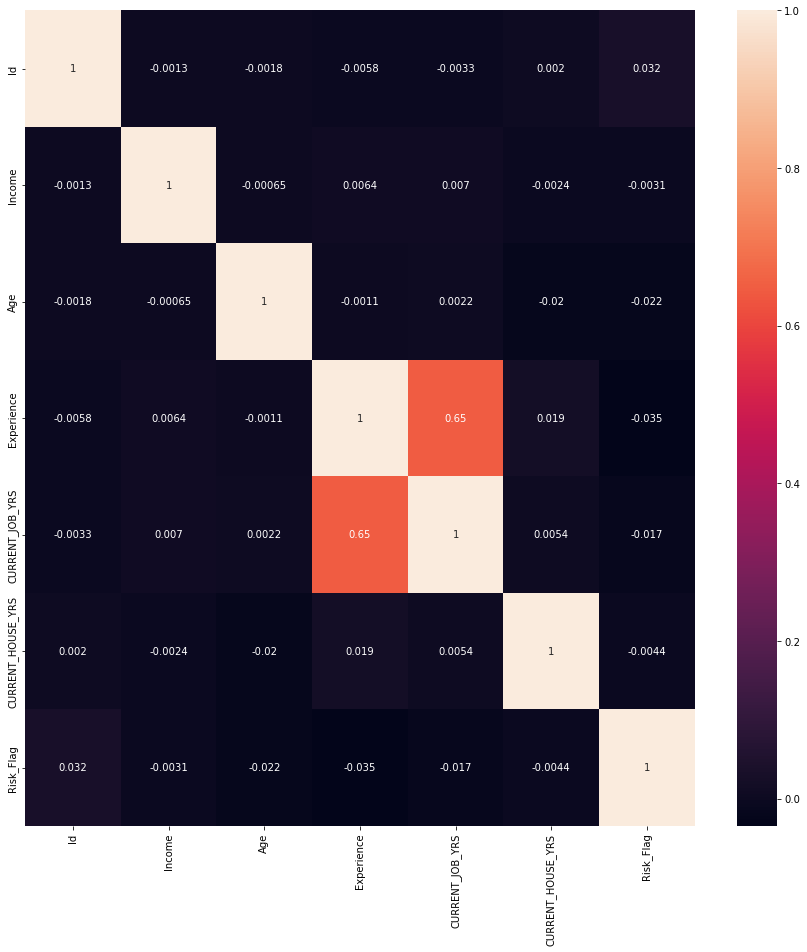

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [11]:
data = data.drop("Id", axis = 1)

In [12]:
len(data.columns)

12

In [18]:
Data=data[['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership']]

In [19]:
Data['Target']=data['Risk_Flag']

C:\Users\R.Gokulprasath\AppData\Local\Temp\ipykernel_11868\3267193094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Target']=data['Risk_Flag']


In [20]:
Data

,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Target
0,23,3,single,rented,no,0
1,40,10,single,rented,no,0
2,66,4,married,rented,no,0
3,41,2,single,rented,yes,1
4,47,11,single,rented,no,1
...,...,...,...,...,...,...
251995,43,13,single,rented,no,0
251996,26,10,single,rented,no,0
251997,46,7,single,rented,no,0
251998,45,0,single,rented,no,0


In [21]:
en = LabelEncoder()
catCols = ['Married/Single','House_Ownership','Car_Ownership']
for cols in catCols:
    Data[cols] = en.fit_transform(Data[cols])
y = Data["Target"]
X = Data.drop("Target",axis = 1)
Y=pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)
clf = XGBClassifier(learning_rate=0.1, 
                n_estimators=50, 
                use_label_encoder=False,
                random_state=42)
clf.fit(X_train, y_train, eval_metric='logloss')
predictions = clf.predict(X_test) 
print("accuracy_score: " + str(accuracy_score(y_test, predictions)))

C:\Users\R.Gokulprasath\AppData\Local\Temp\ipykernel_11868\1661080388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data[cols] = en.fit_transform(Data[cols])
C:\Users\R.Gokulprasath\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\R.Gokulprasath\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


accuracy_score: 0.8759325396825397


In [27]:
with open('loanPrediction.pkl', 'wb') as file:  
    pickle.dump(clf, file)

In [28]:
pickled_model = pickle.load(open('loanPrediction.pkl', 'rb'))

In [29]:
pickled_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
print(accuracy_score(y_test,pickled_model.predict(X_test)))

0.8759325396825397
